In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import csv
import openpyxl
from itertools import islice

# Convert QuPath data to pandas

In [3]:
input_file = '../Results/404_cell_position.txt'

wb = openpyxl.Workbook()
ws = wb.worksheets[0]

with open(input_file, 'r') as data:
    reader = csv.reader(data, delimiter='\t')
    for row in reader:
        ws.append(row) 

In [4]:
data = ws.values
cols = next(data)[1:]
data = list(data)
print(data[0])
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_404 = pd.DataFrame(data, index=idx, columns=cols)

('SLD_0000404.vsi - 20x_01', 'PathDetectionObject', '', 'S1', 'Polygon', '10994.1', '1579.9', '0.9553', '204.0999', '51.3083', '0.9743', '1', '17.1725', '14.9909', '0.4352', '0.4596', '0.0985', '0.6285', '0.1088', '-0.0564', '-0.065', '-0.1214', '0.0345', '0.0307')


In [5]:
df_404

,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Detection probability,Area µm^2,Length µm,Circularity,...,Hematoxylin: Mean,Hematoxylin: Median,Hematoxylin: Min,Hematoxylin: Max,Hematoxylin: Std.Dev.,DAB: Mean,DAB: Median,DAB: Min,DAB: Max,DAB: Std.Dev.
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10994.1,1579.9,0.9553,204.0999,51.3083,0.9743,...,0.4352,0.4596,0.0985,0.6285,0.1088,-0.0564,-0.065,-0.1214,0.0345,0.0307
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10338.3,1086.9,0.9483,141.9265,42.9522,0.9667,...,0.3894,0.3993,0.0851,0.7853,0.1471,-0.0271,-0.0311,-0.0993,0.0558,0.0345
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10910,1918.6,0.9421,78.139,31.9661,0.9609,...,0.3618,0.4018,0.1157,0.5214,0.1028,-0.0338,-0.0439,-0.0819,0.0481,0.0311
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10814.4,1857.8,0.9394,106.109,36.9105,0.9787,...,0.3775,0.4081,0.0821,0.5759,0.1284,-0.0219,-0.0319,-0.077,0.0661,0.035
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10864.3,860.66,0.9386,150.2629,44.0608,0.9727,...,0.3957,0.4206,0.1099,0.6633,0.1043,-0.047,-0.0589,-0.1084,0.0572,0.0359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10156,1380.9,0.4702,29.2688,19.9869,0.9207,...,0.4403,0.4262,0.2824,0.6486,0.1003,-0.0518,-0.0514,-0.0971,-0.0153,0.0195
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,11446.9,1269.3,0.4702,20.3005,19.4503,0.6743,...,0.3809,0.3806,0.2474,0.6075,0.0756,-0.0391,-0.0442,-0.0832,0.0154,0.0245
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10433.2,2023.4,0.47,23.5266,21.2471,0.6549,...,0.5055,0.4886,0.3132,0.7993,0.106,-0.0701,-0.067,-0.1213,-0.0357,0.0233
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10584.6,890.43,0.47,31.5718,28.3127,0.4949,...,0.4108,0.4176,0.2208,0.6116,0.1034,-0.0454,-0.0477,-0.077,0.0031,0.0165


In [6]:
centroid_x = df_404['Centroid X µm'].to_numpy(dtype=float)
centroid_y = df_404['Centroid Y µm'].to_numpy(dtype=float)

#  analyse

In [7]:
button=centroid_y.min()
top=centroid_y.max()
z_length = 50 # um
nb_slice = 100

# compute fractions

In [8]:
length = top - button
fractions=np.zeros(centroid_y.shape[0], dtype=float)
for index, point in enumerate(centroid_y):
    fractions[index]=(point-button) / (length)

# Plot positions and fraction histogram

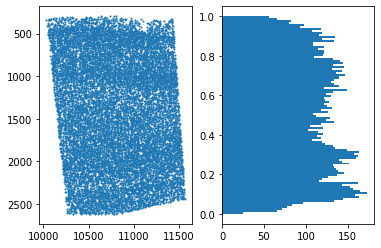

In [9]:
plt.subplot(121)
plt.gca().invert_yaxis()
_ = plt.scatter(centroid_x, centroid_y, s=1)
plt.subplot(122)
fract_hist = plt.hist(fractions, nb_slice, orientation='horizontal')

In [10]:
nb_points_per_bin = fract_hist[0]

# Split data by slice

In [11]:
y_length = centroid_y.max() - centroid_y.min()
slice_max_y = centroid_y.min()
last_y = centroid_y.min()
y_length / nb_slice
masks=[]
for i in range(nb_slice):
    slice_max_y += (y_length / nb_slice)
    masks.append(np.where((centroid_y >= last_y) & (centroid_y < slice_max_y))[0])
    last_y = slice_max_y
    

In [12]:
slice_points = []
for mask in masks:
    x=centroid_x[mask]
    y=centroid_y[mask]
    slice_points.append(np.vstack((x, y)).T)

# Compute slices area thanks to from scipy.spatial.ConvexHull

In [13]:
hulls = []
for i in range(nb_slice):
    hulls.append(ConvexHull(slice_points[i]))

slice Area: 12039.274999999992


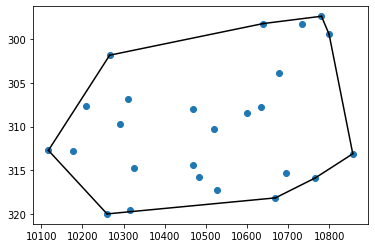

slice Area: 26817.07950000001


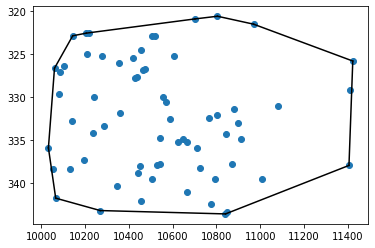

slice Area: 26872.416499999974


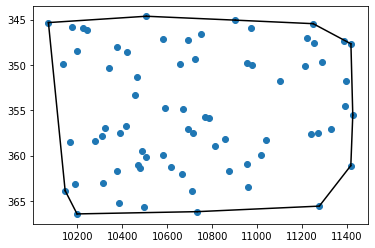

slice Area: 26836.772000000015


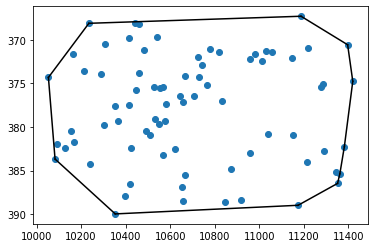

slice Area: 27788.152000000002


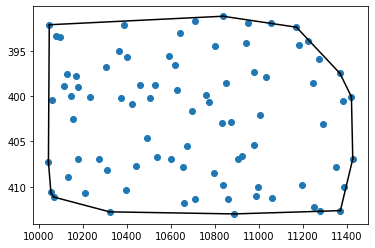

slice Area: 26239.39299999998


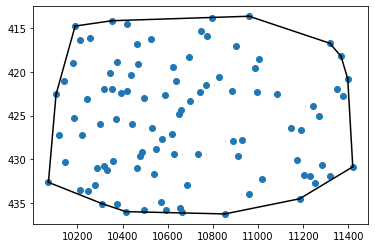

slice Area: 28422.377999999982


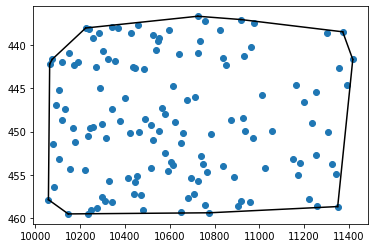

slice Area: 29011.259499999986


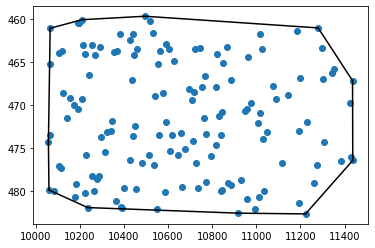

slice Area: 29461.29149999996


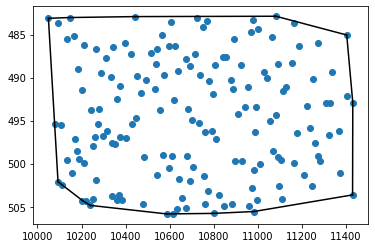

slice Area: 30750.761499999946


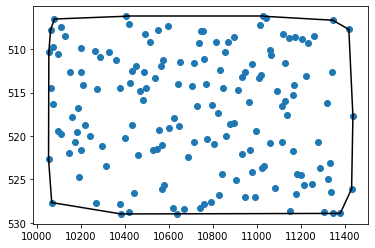

slice Area: 29773.347499999985


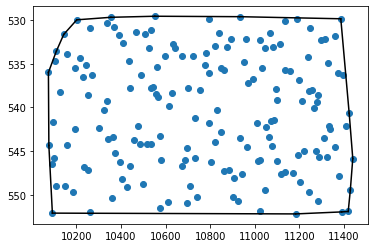

slice Area: 30089.286000000036


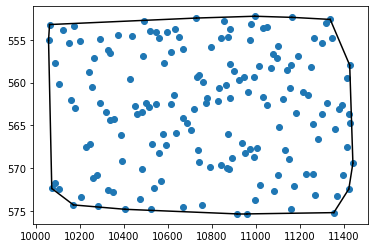

slice Area: 29041.63300000003


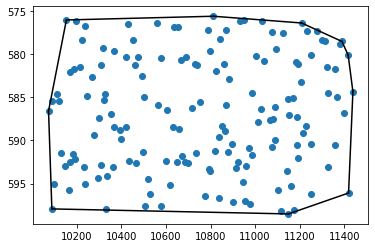

slice Area: 28505.43450000001


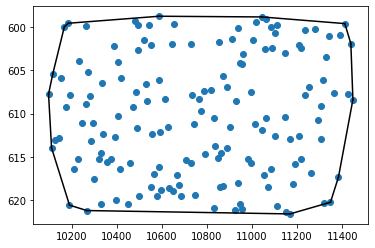

slice Area: 28610.60050000014


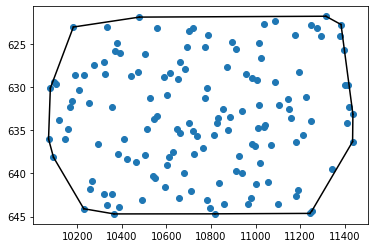

slice Area: 28912.454500000036


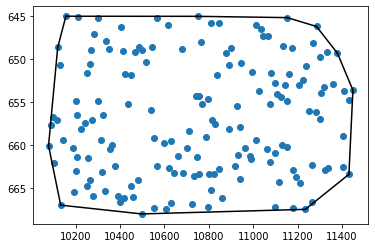

slice Area: 28729.68649999998


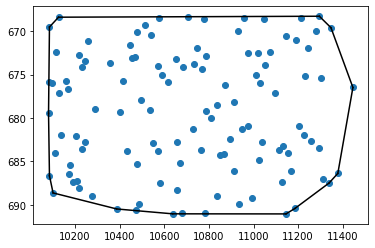

slice Area: 28822.24049999999


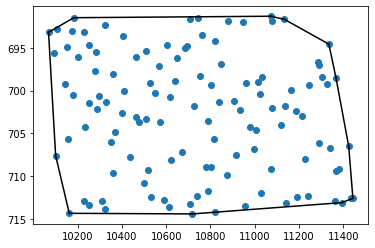

slice Area: 28280.172500000015


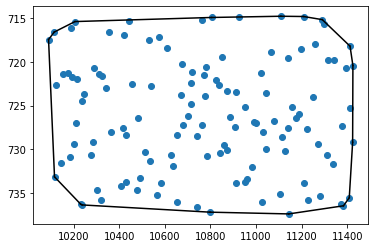

slice Area: 27745.72499999998


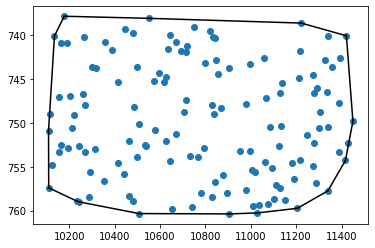

slice Area: 29332.14900000005


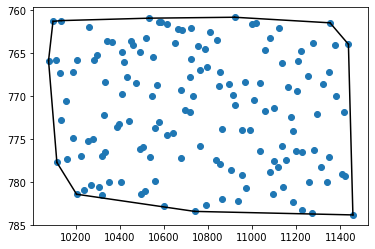

slice Area: 29607.058499999996


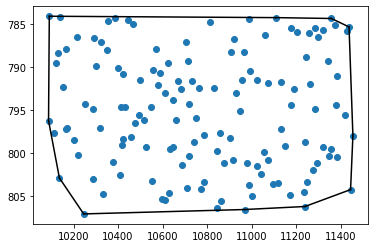

slice Area: 29275.794000000045


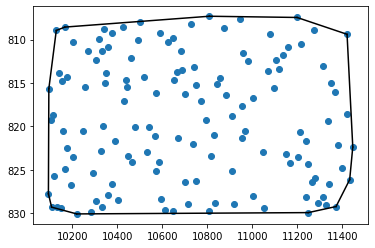

slice Area: 29569.237000000117


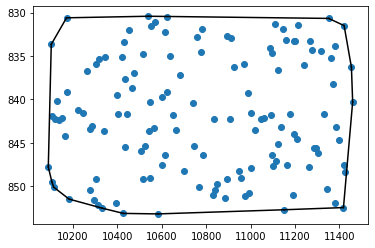

slice Area: 29881.987499999992


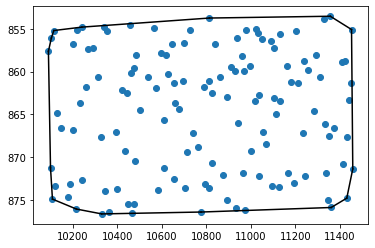

slice Area: 29471.486999999986


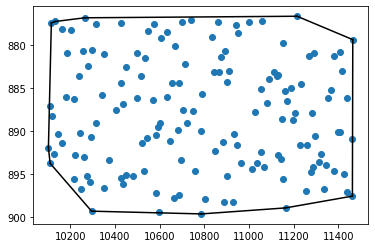

slice Area: 29353.372000000014


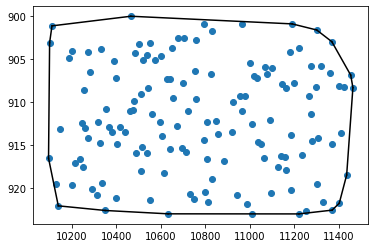

slice Area: 30062.11699999998


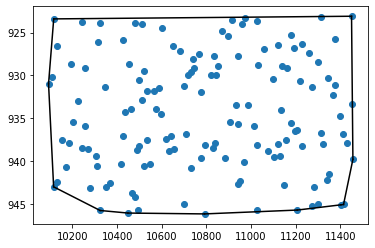

slice Area: 29812.064000000006


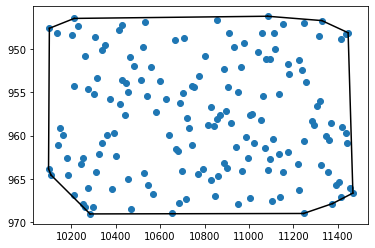

slice Area: 28973.739000000023


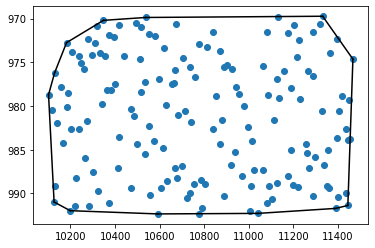

slice Area: 27424.410500000064


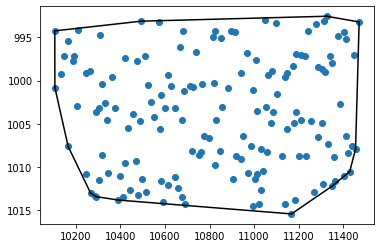

slice Area: 29002.405000000086


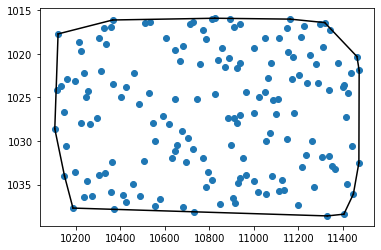

slice Area: 29873.775000000012


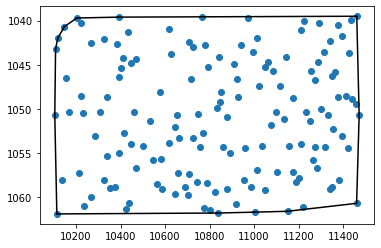

slice Area: 29503.13999999996


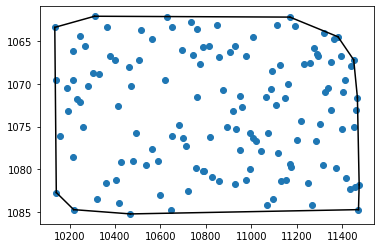

slice Area: 29190.715000000146


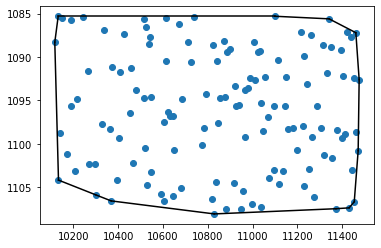

slice Area: 28176.785000000036


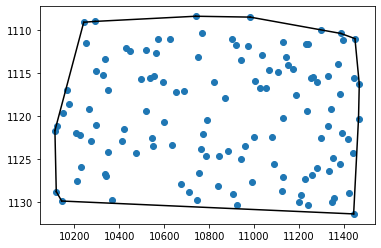

slice Area: 28669.505000000056


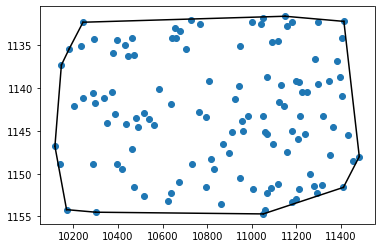

slice Area: 29095.189999999973


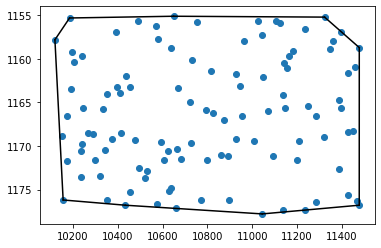

slice Area: 28951.000000000095


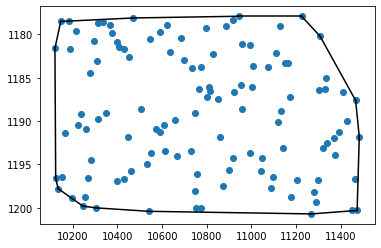

slice Area: 29245.310000000052


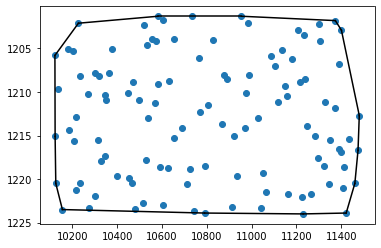

slice Area: 27958.950000000004


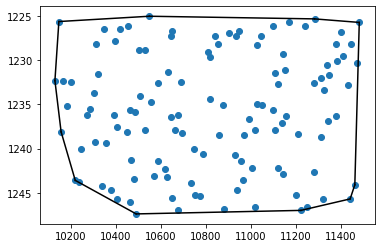

slice Area: 28124.46000000002


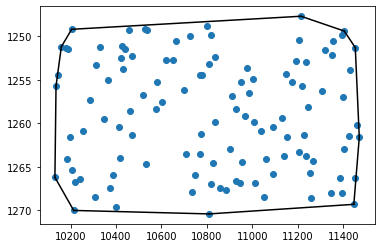

slice Area: 28128.620000000075


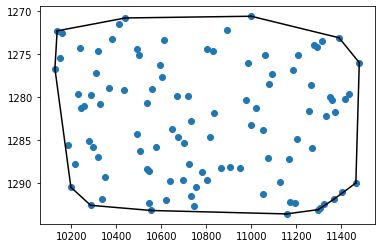

slice Area: 28336.354999999927


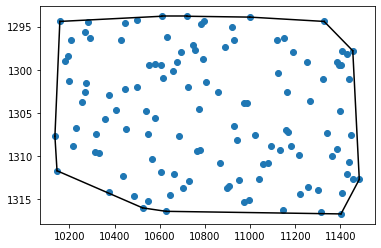

slice Area: 28596.385000000024


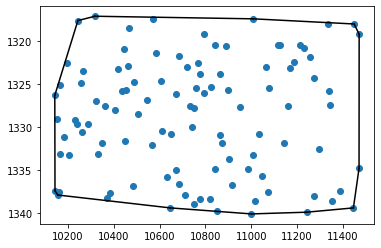

slice Area: 27032.179999999982


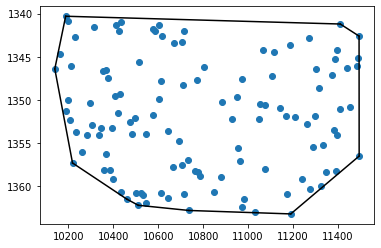

slice Area: 28919.419999999947


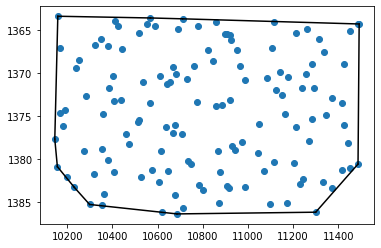

slice Area: 28921.035000000167


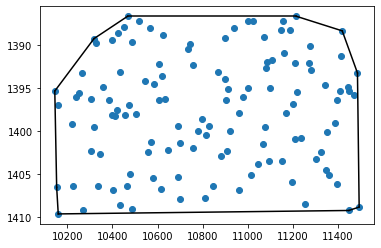

slice Area: 27390.309999999972


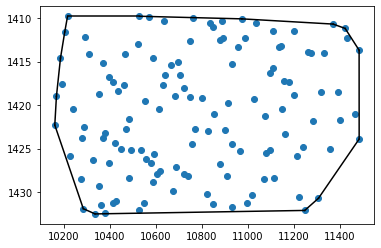

slice Area: 28259.145000000277


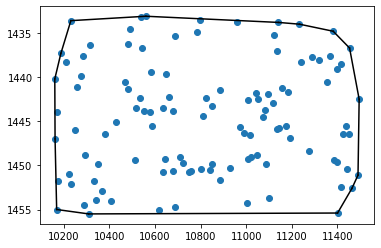

slice Area: 28318.04999999998


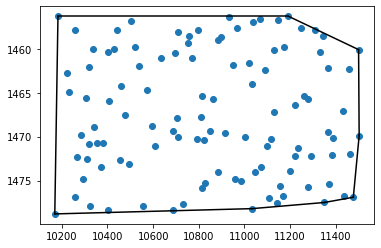

slice Area: 29618.6


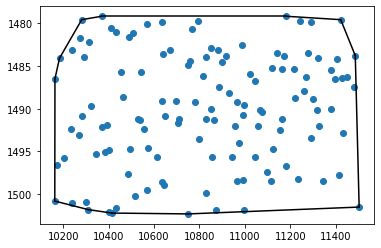

slice Area: 29036.854999999818


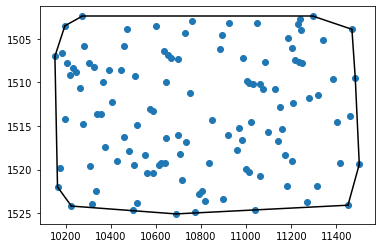

slice Area: 28242.929999999993


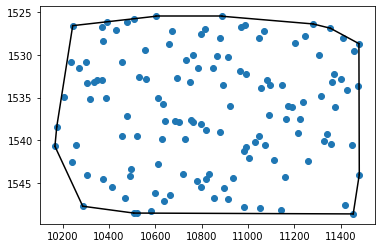

slice Area: 28082.610000000044


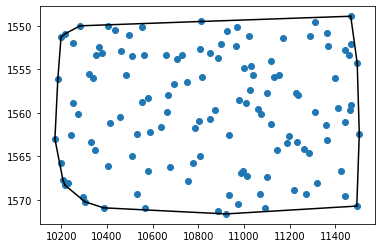

slice Area: 27302.860000000037


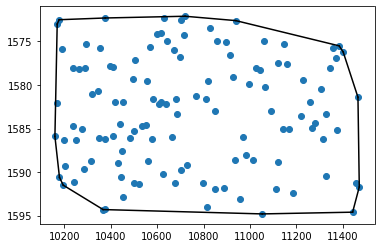

slice Area: 29320.795000000093


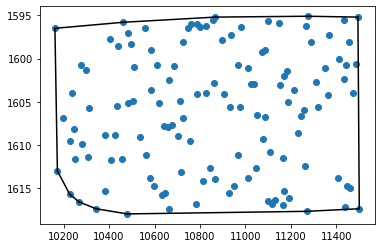

slice Area: 29096.854999999916


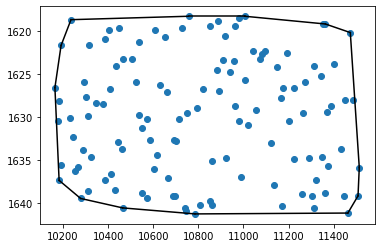

slice Area: 29484.7699999999


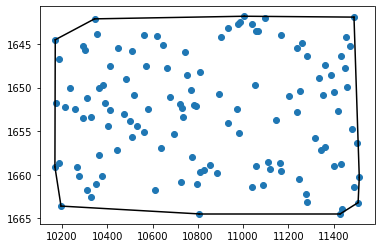

slice Area: 28556.12999999997


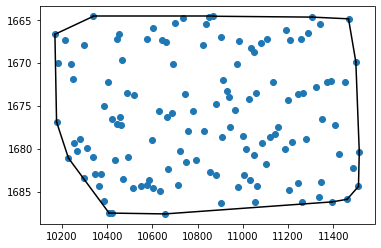

slice Area: 29170.375000000015


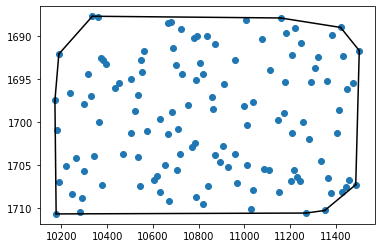

slice Area: 27694.635000000064


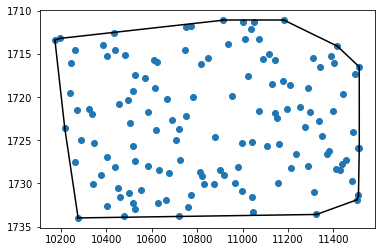

slice Area: 28838.585000000017


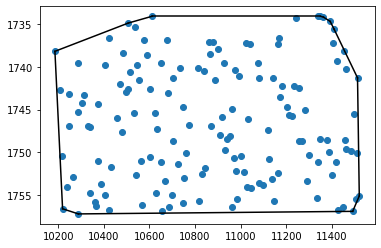

slice Area: 27846.049999999854


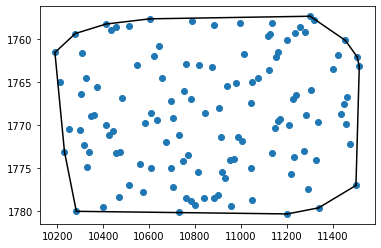

slice Area: 29356.38500000007


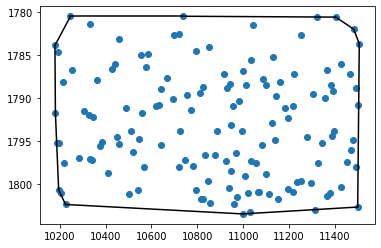

slice Area: 28235.820000000185


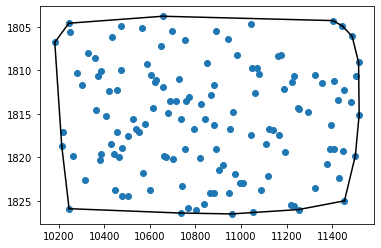

slice Area: 28620.275000000016


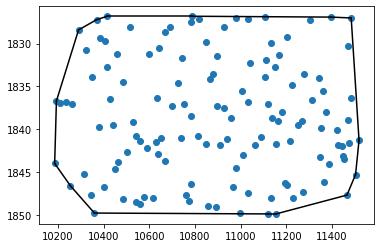

slice Area: 29097.425000000057


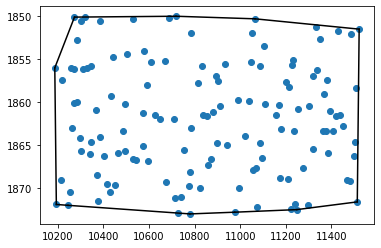

slice Area: 28785.614999999965


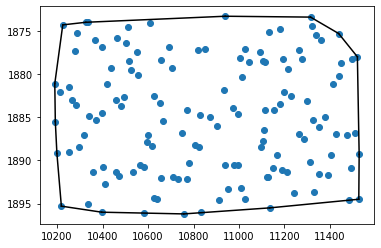

slice Area: 28656.94000000015


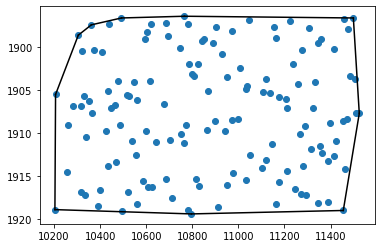

slice Area: 28399.119999999995


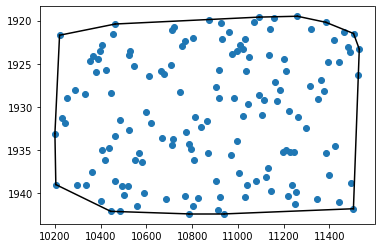

slice Area: 27684.810000000198


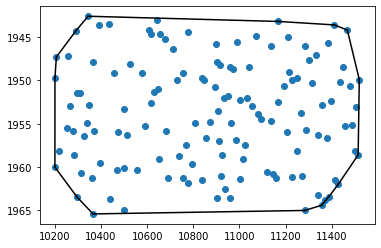

slice Area: 28039.030000000053


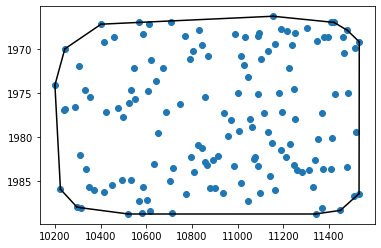

slice Area: 27902.144999999968


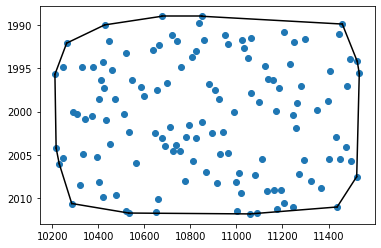

slice Area: 28066.519999999844


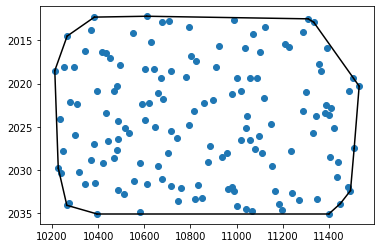

slice Area: 28604.65000000032


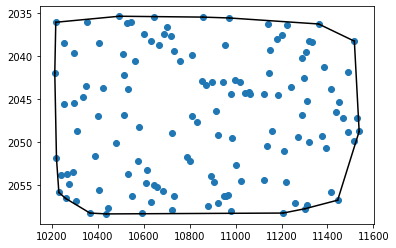

slice Area: 26920.534999999923


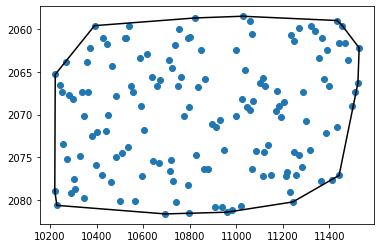

slice Area: 29551.569999999665


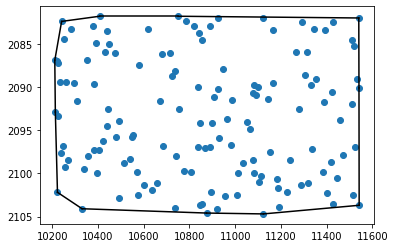

slice Area: 28253.665000000186


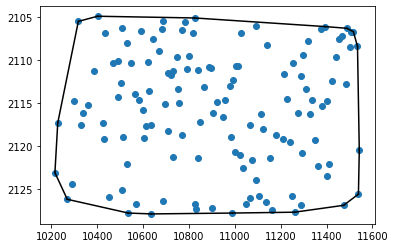

slice Area: 27488.94500000021


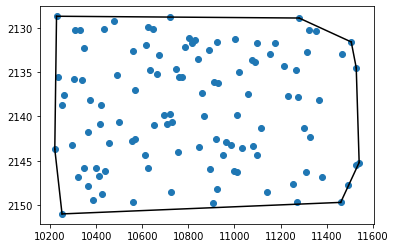

slice Area: 26482.78499999971


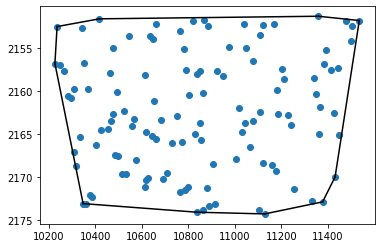

slice Area: 27283.34000000009


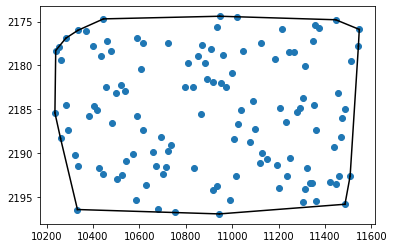

slice Area: 28436.30999999991


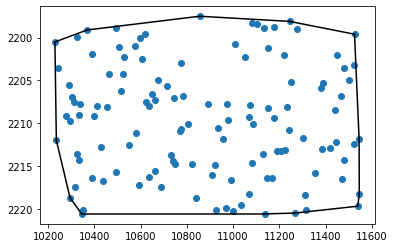

slice Area: 28064.77000000004


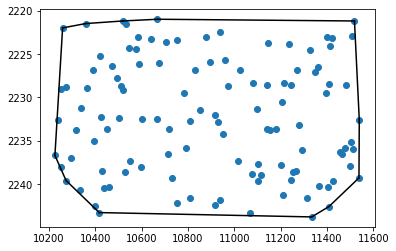

slice Area: 28323.17499999988


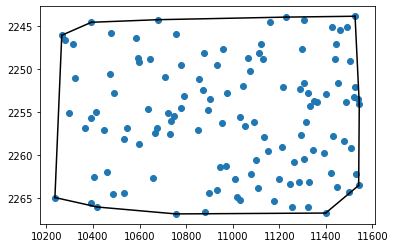

slice Area: 27613.00999999978


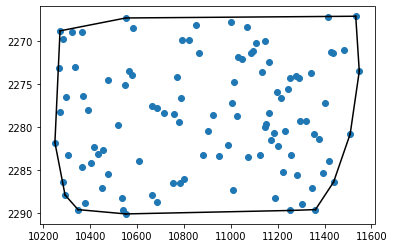

slice Area: 25088.489999999823


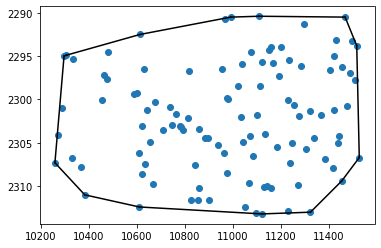

slice Area: 26328.7100000002


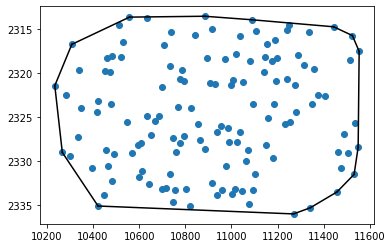

slice Area: 26874.724999999613


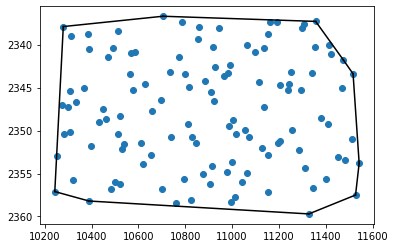

slice Area: 28468.609999999644


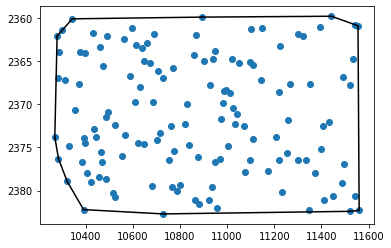

slice Area: 27949.76999999975


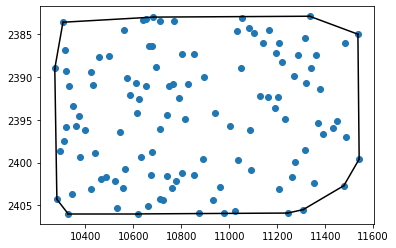

slice Area: 28231.91500000017


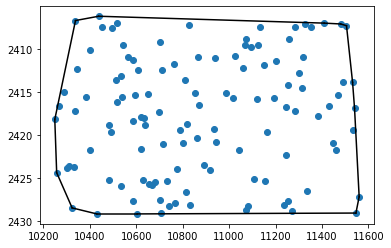

slice Area: 26089.454999999907


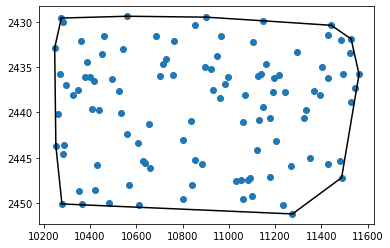

slice Area: 25174.480000000036


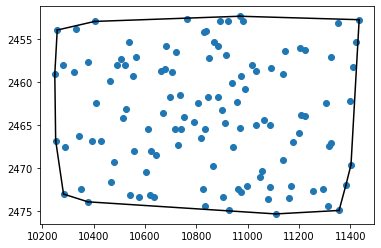

slice Area: 22177.074999999968


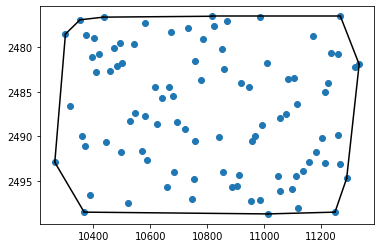

slice Area: 19053.13500000001


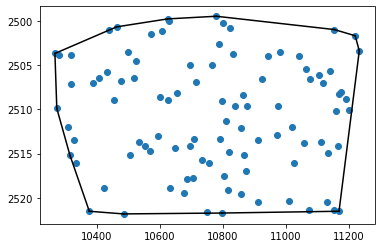

slice Area: 15906.769999999915


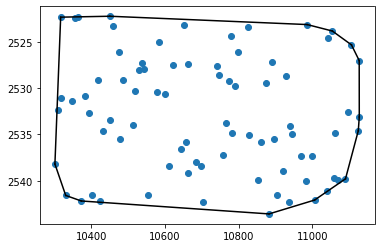

slice Area: 16402.21499999994


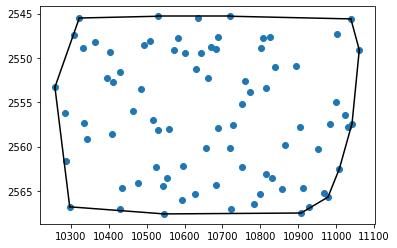

slice Area: 13676.645000000088


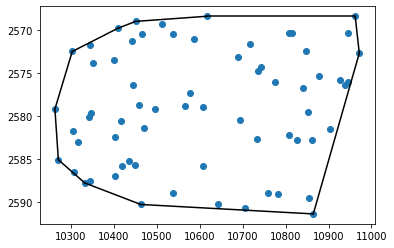

slice Area: 11764.000000000027


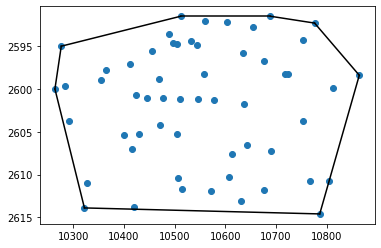

In [14]:
areas = []
for i in range(nb_slice):
    plt.gca().invert_yaxis()
    plt.plot(slice_points[i][:,0], slice_points[i][:,1], 'o')
    for simplex in hulls[i].simplices:
        plt.plot(slice_points[i][simplex, 0], slice_points[i][simplex, 1], 'k-')
    print('slice Area:', hulls[i].volume)
    areas.append(hulls[i].volume)
    plt.show()

(array([ 2.,  1.,  2.,  1.,  0.,  1.,  0., 11., 47., 35.]),
 array([11764.     , 13662.67615, 15561.3523 , 17460.02845, 19358.7046 ,
        21257.38075, 23156.0569 , 25054.73305, 26953.4092 , 28852.08535,
        30750.7615 ]),
 <a list of 10 Patch objects>)

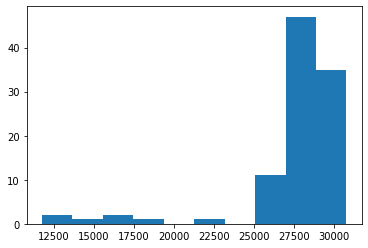

In [26]:
plt.hist(areas)

# Compute densities from fractions and volume

In [27]:
densities = nb_points_per_bin / (np.array(areas) * z_length)

(array([ 1.,  2.,  2.,  0.,  7., 23., 25., 21., 12.,  7.]),
 array([4.15307400e-05, 4.89987980e-05, 5.64668559e-05, 6.39349139e-05,
        7.14029718e-05, 7.88710298e-05, 8.63390877e-05, 9.38071457e-05,
        1.01275204e-04, 1.08743262e-04, 1.16211320e-04]),
 <a list of 10 Patch objects>)

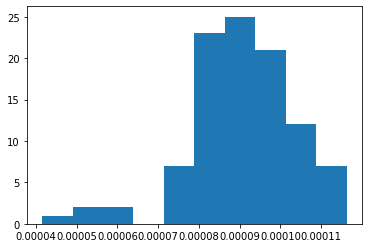

In [28]:
plt.hist(densities) # nb_cell by um3

(array([ 1.,  0.,  3.,  5.,  3., 10., 29., 30., 11.,  8.]),
 array([ 25. ,  39.8,  54.6,  69.4,  84.2,  99. , 113.8, 128.6, 143.4,
        158.2, 173. ]),
 <a list of 10 Patch objects>)

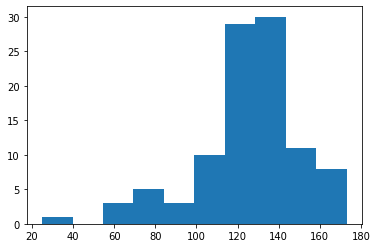

In [29]:
plt.hist(nb_points_per_bin)

In [15]:
arr = np.array([[2,40],[3,20],[1,30]])

In [16]:
arr

array([[ 2, 40],
       [ 3, 20],
       [ 1, 30]])

In [17]:
np.sort(arr, axis=1)

array([[ 2, 40],
       [ 3, 20],
       [ 1, 30]])

In [18]:
np.sort(arr, axis=0)

array([[ 1, 20],
       [ 2, 30],
       [ 3, 40]])

In [21]:
arr[arr[:, 1].argsort()]

array([[ 3, 20],
       [ 1, 30],
       [ 2, 40]])